In [1]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [2]:
base_dados = pd.read_csv('base_treinamento.txt', encoding='utf-8')
base_dados.shape

(196, 2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


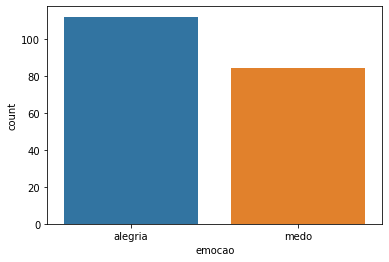

In [3]:
sns.countplot(base_dados['emocao'], label='Contagem');

In [4]:
pontuacoes = string.punctuation

from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS


In [18]:
pln = spacy.load('pt_core_news_sm')

def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)
  
  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [19]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)
base_dados.head()

,texto,emocao
0,generator object preprocessamento.<locals>.<ge...,alegria
1,generator object preprocessamento.<locals>.<ge...,alegria
2,generator object preprocessamento.<locals>.<ge...,alegria
3,generator object preprocessamento.<locals>.<ge...,alegria
4,generator object preprocessamento.<locals>.<ge...,alegria


In [15]:
base_dados_final = []
i = 0
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
    if emocao == 'alegria':
        dic = ({'Alegria': True, 'MEDO': False})
    else:
        dic = ({'Alegria': False, 'MEDO': True})
    
    base_dados_final.append([texto, dic.copy()])

base_dados_final

[['< g e n e r a t o r   o b j e c t   p r e p r o c e s s a m e n t o . < l o c a l s > . < g e n e x p r >   a t   0 x 0 0 0 0 0 2 1 C 0 6 F 7 0 E B 0 >',
  {'Alegria': True, 'MEDO': False}],
 ['< g e n e r a t o r   o b j e c t   p r e p r o c e s s a m e n t o . < l o c a l s > . < g e n e x p r >   a t   0 x 0 0 0 0 0 2 1 C 0 6 F 7 0 E B 0 >',
  {'Alegria': True, 'MEDO': False}],
 ['< g e n e r a t o r   o b j e c t   p r e p r o c e s s a m e n t o . < l o c a l s > . < g e n e x p r >   a t   0 x 0 0 0 0 0 2 1 C 0 6 F 7 0 E B 0 >',
  {'Alegria': True, 'MEDO': False}],
 ['< g e n e r a t o r   o b j e c t   p r e p r o c e s s a m e n t o . < l o c a l s > . < g e n e x p r >   a t   0 x 0 0 0 0 0 2 1 C 0 6 F 7 0 E B 0 >',
  {'Alegria': True, 'MEDO': False}],
 ['< g e n e r a t o r   o b j e c t   p r e p r o c e s s a m e n t o . < l o c a l s > . < g e n e x p r >   a t   0 x 0 0 0 0 0 2 1 C 0 6 F 7 0 E B 0 >',
  {'Alegria': True, 'MEDO': False}],
 ['< g e n e r a t o r   o b j

In [22]:
modelo = spacy.blank('pt')
categorias = modelo.create.pipe("textcat")
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")
model.add_pipeline(categorias)
historico = []

AttributeError: 'Portuguese' object has no attribute 'create'